## Step_GLM clientes bancarios morosos
#### Oscar Julian L

Un conjunto de datos simulados que contiene información sobre diez mil clientes 10.000. El objetivo aquí es predecir qué clientes incumplirán con su deuda de tarjeta de crédito. 

Algunas de las variables presentes en el conjunto de datyos llamado **default** son:

* Student: Un factor binario que contiene si un titular de tarjeta de crédito es o no un estudiante.
* Income: El ingreso bruto anual de un titular de tarjeta de crédito determinado.
* Balance: El saldo total de la tarjeta de crédito para un titular de tarjeta de crédito determinado.
* Default: Un factor binario que contiene si un usuario determinado ha incumplido o no su tarjeta de crédito.

El objetivo de nuestra investigación es ajustar un modelo de manera que los predictores relevantes de incumplimiento de la tarjeta de crédito se iluminen dadas estas variables.


### Ingresos, saldo y incumplimiento

¿Existe una relación entre los ingresos, el saldo y el estado del estudiante de modo que uno, dos o todos estos puedan usarse para predecir el incumplimiento de la tarjeta de crédito? 

Es decir se quiere predecir si un individuo entrará en incumplimiento de pagos con su tarjeta de crédito usando las covariables:

* income: ingreso anual
* balance: balance anual
* student: si el individuo es o no estudiante

In [66]:
#Descargando base de datos
library(ISLR)   
data(Default)
str(Default)
head(Default)

'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


default,student,balance,income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


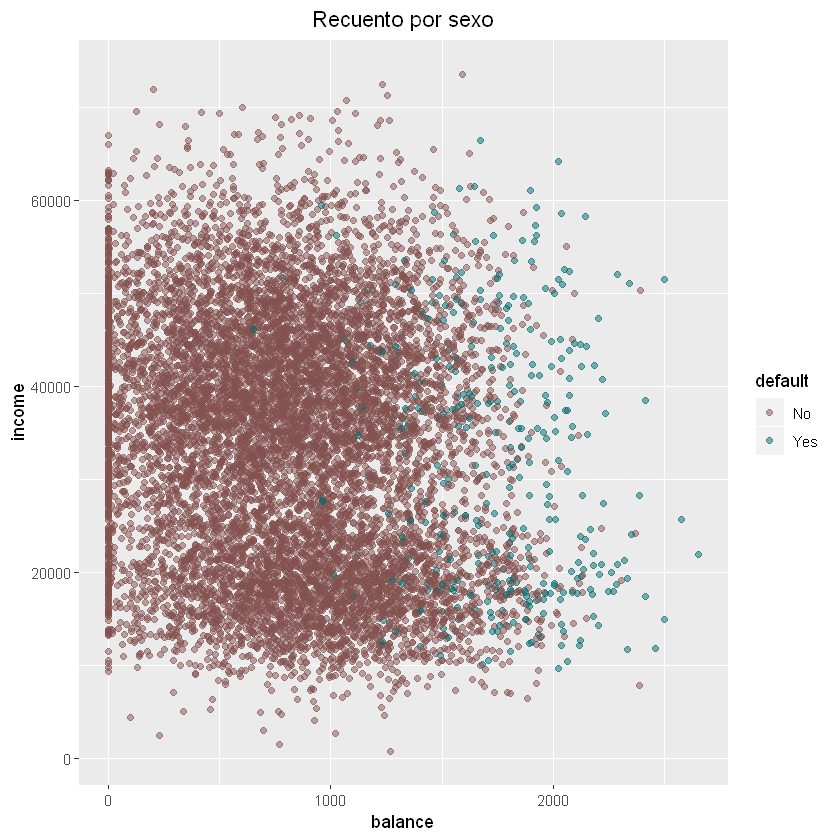

In [67]:
#agrupando por colores
require(ggplot2)
theme_update(plot.title = element_text(hjust = 0.5))    #puede colocarse solo una vez en el doc para no volver acentrar titulos

p1<-ggplot(data=Default, aes(balance,income,color=default)) + geom_point(alpha = 0.5) + scale_color_hue(l=40, c=35)
p1+ggtitle("Recuento por sexo")
                                    #scale_color_hue(l=40, c=35)  para cambiar colores
                                    #scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9"))    #camb colores manualmente
                                    #scale_color_brewer(palette="Dark2")

#qplot(data=Default, balance,income, color = default,  alpha = I(0.7))     #para cambiar el tamaño    size = Petal.Width

In [68]:
require(dplyr)
incumplido<-filter(Default, default == "No")
cumplido<-filter(Default, default == "Yes")
summary(incumplido)
summary(cumplido)

summary(filter(incumplido, student == "Yes"))

 default    student       balance           income     
 No :9667   No :6850   Min.   :   0.0   Min.   :  772  
 Yes:   0   Yes:2817   1st Qu.: 465.7   1st Qu.:21405  
                       Median : 802.9   Median :34589  
                       Mean   : 803.9   Mean   :33566  
                       3rd Qu.:1128.2   3rd Qu.:43824  
                       Max.   :2391.0   Max.   :73554  

 default   student      balance           income     
 No :  0   No :206   Min.   : 652.4   Min.   : 9664  
 Yes:333   Yes:127   1st Qu.:1511.6   1st Qu.:19028  
                     Median :1789.1   Median :31515  
                     Mean   :1747.8   Mean   :32089  
                     3rd Qu.:1988.9   3rd Qu.:43067  
                     Max.   :2654.3   Max.   :66466  

 default    student       balance           income     
 No :2817   No :   0   Min.   :   0.0   Min.   :  772  
 Yes:   0   Yes:2817   1st Qu.: 640.4   1st Qu.:14859  
                       Median : 953.1   Median :17992  
                       Mean   : 948.5   Mean   :17937  
                       3rd Qu.:1260.5   3rd Qu.:21026  
                       Max.   :2388.2   Max.   :33003  

 En la gráfica anterior se puede observar que no existe una tendencia entre el balance y el ingreso, veamos otro tipo de relación entre balance junto con el cumplimiento o incumplimiento:

* Se puede observar que de un total de 10000 personas adscritas al banco 333 no generaron pago alguno presentando *incumplimiento*,  de estas personas el $61.8\%$ son estudiantes es decir 206.
* En el boxplot se identifica que el $50\%$ de los deudores tienen un balance entre 1511.6 y 1988.9 pesos

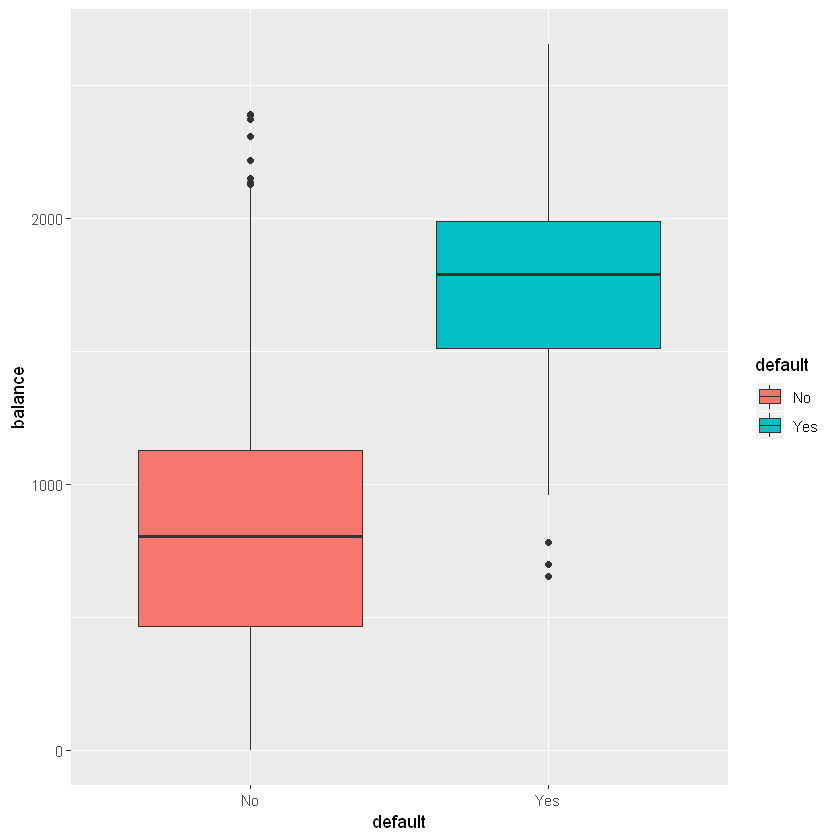

In [69]:
par(mfrow=c(2,1))
p<-ggplot(data=Default, aes(default,balance,fill=default)) +
  geom_boxplot(); p

En lo que corresponde a los ingresos de personas deudoras se tiene que:

* Tienen ingresos promedios de 32089 pesos.
* Se pude identificar que los ingresos promedios en personas cumplidas es 33566 pesos que son similares. 

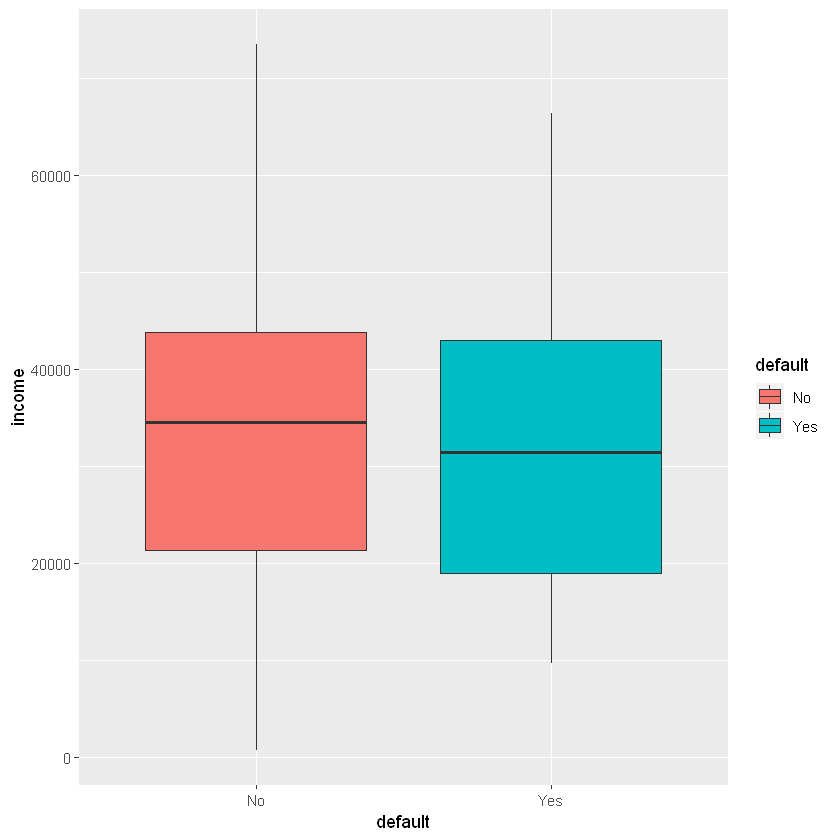

In [70]:
p1<-ggplot(data=Default, aes(default,income,fill=default)) +
  geom_boxplot()
p1

Considerando que el interés se centra en identificar las causas de incumplimiento en personas adscritas al banco, la cual hace parte de una variable aleatoria dicotomica, se especifica quer recae que $Y_k$ se ditribuye bernouli. En este orden de ideas se propone el siguinete modelo linal generalizado.

In [71]:
fit <- glm(default ~ student * balance * income, family="binomial", data=Default)
X <- model.matrix(fit)
summary(fit)


Call:
glm(formula = default ~ student * balance * income, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4949  -0.1410  -0.0551  -0.0202   3.7623  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -1.083e+01  1.962e+00  -5.521 3.37e-08 ***
studentYes                -1.536e+00  3.397e+00  -0.452    0.651    
balance                    5.750e-03  1.244e-03   4.622 3.80e-06 ***
income                    -9.887e-07  4.718e-05  -0.021    0.983    
studentYes:balance         3.548e-04  2.032e-03   0.175    0.861    
studentYes:income          6.366e-05  1.531e-04   0.416    0.678    
balance:income             1.664e-09  2.986e-08   0.056    0.956    
studentYes:balance:income -2.930e-08  8.970e-08  -0.327    0.744    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920

A hora bien, con step_glm se hace un proceso para identificar el mejor modelo en terminnosde menor AIC-BIC

In [72]:
#ESTAS LINEAS ES PARA LLAMAR LAS FUNCIONES REALIZADAS POR EL DOCENTE hernando vanegas
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas") #busca por default en una carpeta en especifica todo.
source("macros.txt")#Lllamar el archivo de macros que está en la carpeta especifica,(son una fuciines especificas del profesor)

step_glm(fit, criterion="BIC", direction = "backward")   #forward  o  backward


  Family:  binomial 
    Link:  logit 

Initial model:
default ~ 1 + student + balance + income + student:balance + student:income + balance:income + student:balance:income 

Step 0 :    
                         Df       BIC       AIC   Deviance+  Pearson^  p-value*
- student:balance:income  1   1635.5381 1585.0657    0.4618    0.2838    0.7439
<none>                        1644.6418 1586.9591    0.4617    0.2827          

Step 1 :  - student:balance:income 
                  Df       BIC       AIC   Deviance+  Pearson^  p-value*
- balance:income   1   1626.3309 1583.0689    0.4618    0.2832    0.9553
- student:balance  1   1626.4323 1583.1703    0.4618    0.2877    0.7469
- student:income   1   1626.5994 1583.3374    0.4617    0.2827    0.6025
<none>                 1635.5381 1585.0657    0.4618    0.2838          

Step 2 :  - balance:income 
                  Df       BIC       AIC   Deviance+  Pearson^  p-value*
- student:balance  1   1617.3303 1581.2785    0.4618    0.2998    0

El anterior codigo establece el mejor modelo. Si usamos el proceso backward, se tiene: 

* **paso 0**: Si quito la interacción tendría un BIC=1635.5381 mucho menor que el bic de no hacer nada. luego es aconsejable quitar la interacción triple. Con el AIC me da la misma conclusión. COn el R^2 basado en desvio (DECIANCE+) tambien.  Con el R^2 basado en la estadística Pearson también (entre mayor mejor). Según el p-valor se establece que hay que sacar esa interacción.   **CONCLUSIÓN: Sacar la interacción triple**.

* **paso 1**: se tienen tres interacciones de las cuales contrastandose con el BIC, AIC se es necesario sacar la interacción balance:income, no obstante en el $R^2_d$ no hay desición ygual que $R^2_p$. Con respecto al **P-valor**  se establece que hay evidencia en contra de la hipotesis nula mas bajita al quitar balance:income es decir balance:income tiene el p-valor más grande.
* **paso 2**: Seguir el razonamiento para establecer el modelo final. 

$$default = 1 + student + balance$$

## Residuos y Envelope

según las especificaciones del anterior proceso, el modelo final está determinado por:


Call:
glm(formula = default ~ 1 + student + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4578  -0.1422  -0.0559  -0.0203   3.7435  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.075e+01  3.692e-01 -29.116  < 2e-16 ***
studentYes  -7.149e-01  1.475e-01  -4.846 1.26e-06 ***
balance      5.738e-03  2.318e-04  24.750  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.7  on 9997  degrees of freedom
AIC: 1577.7

Number of Fisher Scoring iterations: 8


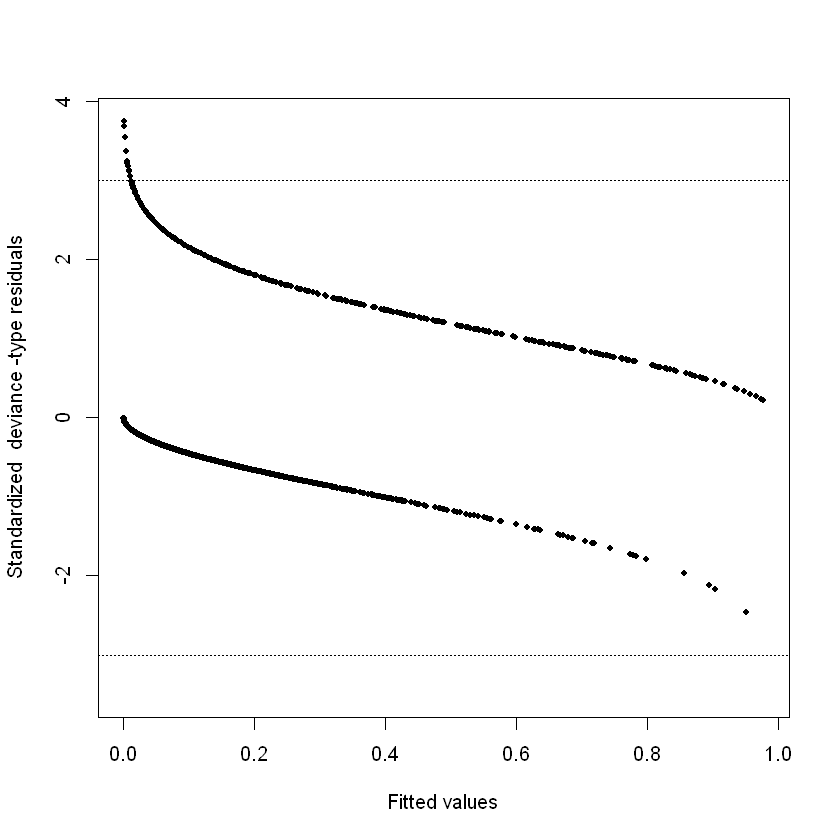

In [74]:
fit <- glm(default ~ 1+ student + balance, family="binomial", data=Default)
summary(fit)
residuals_glm(fit, type="deviance")

En la anterior gráfica se grafican los residuos, en el eje x están los valores ajustados que van de 0-1. en el eje y va el residuo cuantil estandarizado (estandarizado es que está dividido entre $\sqrt{1-h_{kk}}$). En el gráfico se observa un patron en el que se ve una simetria alrededor del cero (unos residuos positivos y otros negativos). La diferencia entre los dos residuos está explicita en $y_k - \mu_k$, para residuos positivos se tiene que  $y_k=1$ y $\hat{\mu_k}=0$ es decir que la probabilidad de exito  es bajita.

los otros residuos es lo contrario, cuando $y_k=0$ y $\hat{\mu_k}=1$ La probabilidad de exito es grande. Al no conocer la distribución conjunta de los residuos, se procede a hacer el envelope:

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


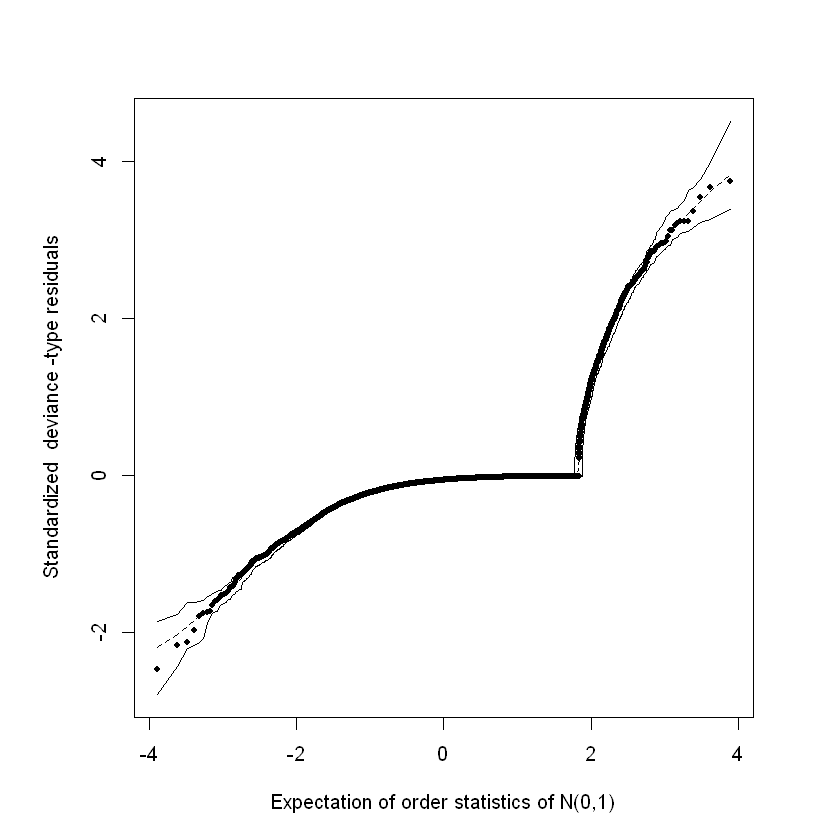

In [22]:
envelope_glm(fit, type="deviance")

Parece estar dentro de las bandas, a continuación se procede a graficar los residuos de Pearson:

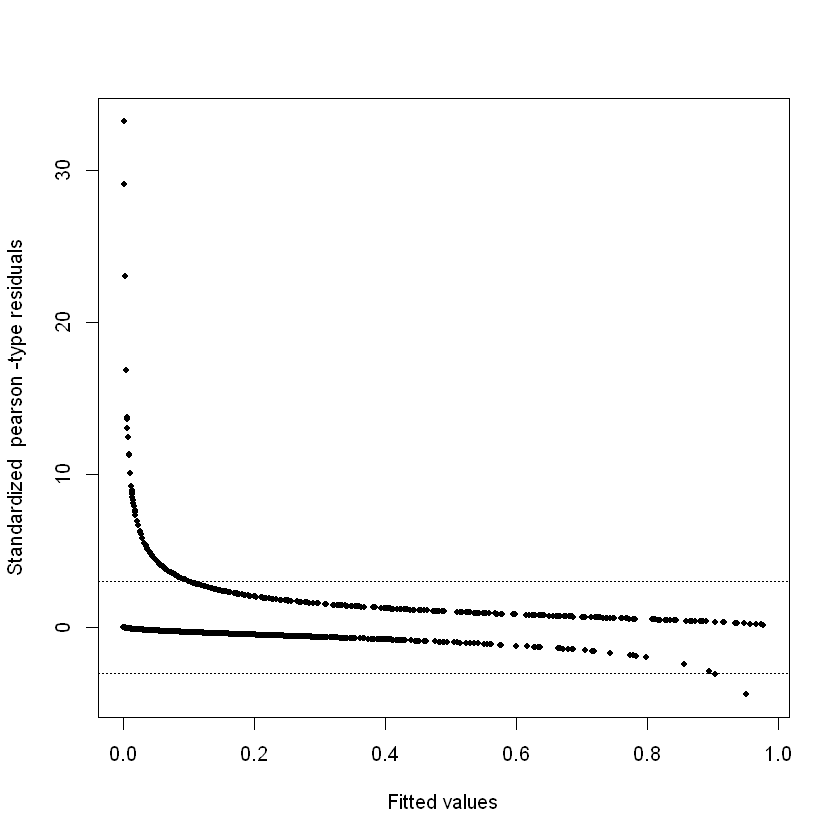

In [19]:
residuals_glm(fit, type="pearson")

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


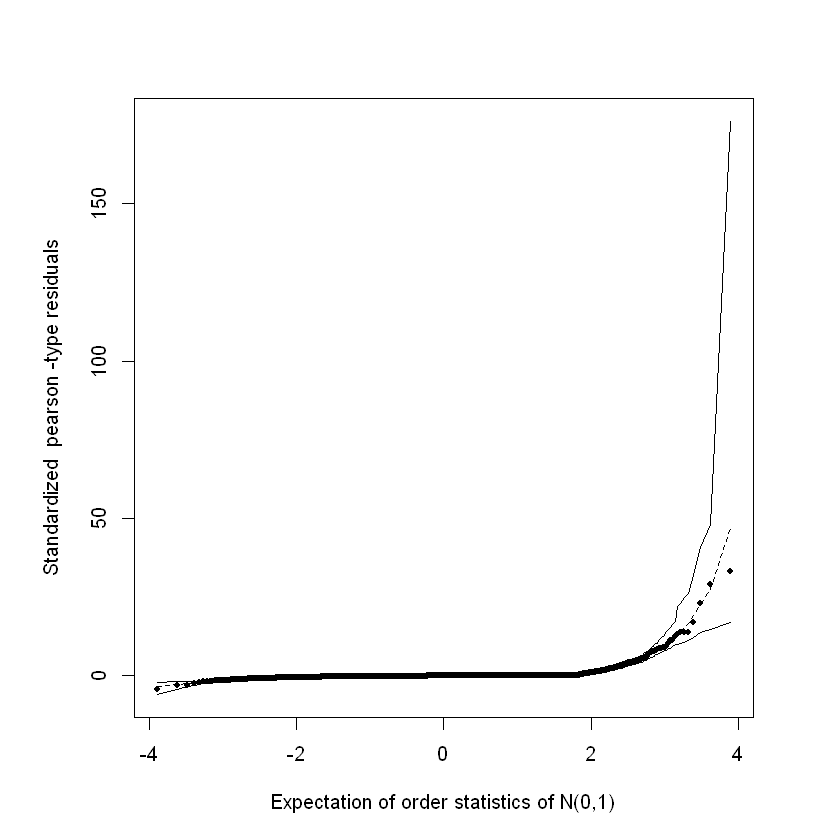

In [16]:
envelope_glm(fit, type="pearson")

Lo que nos guia el comportamiento que sea normal son las bandas. esto nos dice que son residuos sanos, sin embargo estamos acostumbrados a ver qqplots en linea recta. Sin embargo al no conocer la distribucion de los residuos las bandas simuladas puede ayudar a decidir si los residuos observados son consistentes con el modelo ajustado.

# Interpretación de los $\beta$ dada la función de enlace Logit


  $\;$
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           n_k Y_k \sim Binomial(n_k, \mu_k)\\
		 g(\mu_k)=\mathbf{x}_k'\beta = \beta_1 + \beta_2 x_{k} + \beta_3 x_{k3} \\
		 Y_1,  Y_2, ..., Y_n
	       \end{array}
	     \right.
   \end{equation*}
   $$
   
   
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           n_k Y_k \sim Binomial(n_k, \mu_k)\\
		 log(\frac{\mu_k}{1-\mu_k})=\mathbf{x}_k'\beta = \beta_1 + \beta_2 studentYes_{k2} + \beta_3 balance_{k3} \\
		 Y_1,  Y_2, ..., Y_n
	       \end{array}
	     \right.
   \end{equation*}
   $$
   
   

Al tratarse de la función de enlace **logit** donde:

$$log(\frac{\mu_k}{1-\mu_k})= \beta_1 + \beta_2 student_{k} +  \beta_3 balance_{k}$$

--- 

Aplicando exponencial y considerando que es estudiante endeudado **student:Yes=1** se tiene:

 $$\frac{\mu_k}{1-\mu_k} = \frac{ exp[ \beta_1 + \beta_2 student_{k} +  \beta_3 balance_{k}]}{ exp[ \beta_1 + \beta_2 student_{k} +  \beta_3 balance_{k}]} = exp(\beta_2)$$
 
Al suponer que $\hat{\beta}_2=-0.714$, se tiene:

  $$exp(\hat{\beta}_3) = exp(-0.714)=  0.489$$
 
* **Interpretación tipo de cliente:** Al comparar dos personas clientas del banco además los dos con el mismo balance, uno estudiante y el otro no. El chance de tener un dedudor estudiante es $51\%$ menor del que no es estudiante.

---

Caso variable continua:

 $$\frac{\mu_k}{1-\mu_k} = \frac{ exp[ \beta_1 + \beta_2 student +  \beta_3 (X_{0}+\delta)]}{ exp[ \beta_1 + \beta_2 student +  \beta_3 (X_{0}+\delta)]} = exp(\beta_3\delta) $$
 
Considerando que $\hat{\beta}_2=0.005$, se tiene:

  $$exp(\hat{\beta}_2) = exp(0.005)= 1.0050$$
 
* **Interpretación balance:** Por cada unidad adicional en el balance de las personas pertenecientes al banco, el chance de ser deudores es de $0.005\%$.

<div class="alert alert-danger" role="alert">
    <b>Nota:</b>
    
Recuerde que $\delta$ depende de las unidades por ejemplo si se trata de x son cada 10.000 habitantes , $\delta=10000$
</div>

In [80]:
coef(fit)

(Intercept)    studentYes       balance 
-10.749495878  -0.714877620   0.005738104

## NOTA:   

Para instalar librerias de R en jupyter notebooks usamos la siguiente linea 

* install.packages("ISLR", "/home/user/anaconda3/lib/R/library")  no usar este comando
* install.packages("sm", "/Users/YULY/anaconda/Lib/R/library")

Para más información verificar el siguiente enlace::

https://www.pythond.com/23094/conda-como-instalar-paquetes-r-que-no-estan-disponibles-en-r-essentials.html

* También puede usarse el siguiente comando desde r para instalar el entorno de r 

install.packages("CASdatasets", "/Users/YULY/anaconda/Lib/R/library",repos = "http://cas.uqam.ca/pub/R/")
